### 패키지 참조

In [1]:
from pandas import DataFrame,read_csv,read_excel,merge,melt,pivot_table
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import sys
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo

### 폰트세팅

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 불러오기

In [3]:
origin=read_excel('행정동병합최종.xlsx')
origin.head(2)

,시도명,시군구코드,시군구명,행정동코드,행정동코드_수정,읍면동명,생성일자,말소일자,지하철역_수,의료기관_수,...,보육시설수,세대당공원면적minmax,수변점수,행정동별버스정류장수,행정동별유통업체수,공공자전거대여소수,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,그린지수minmax
0,서울특별시,11110,종로구,1111051500,11110515,청운효자동,20081101,0,0,11,...,4,0.352898,0,32,0,3,0.038298,0.120179,0.035322,0.187151
1,서울특별시,11110,종로구,1111053000,11110530,사직동,19880423,0,2,75,...,0,0.063554,0,27,0,12,0.093504,0.033721,0.131414,0.033704


### 읍면동 및 지수만 뽑아내기

In [4]:
origin1=origin.filter(['읍면동명','그린지수minmax','여가생활지수minmax','사회적약자_지원_인프라_밀집도minmax','접근성지수minmax'])
origin1.head(2)

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.187151,0.038298,0.120179,0.035322
1,사직동,0.033704,0.093504,0.033721,0.131414


In [5]:
origin1.isna().sum()
origin2=origin1.copy()
origin2.head(2)

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.187151,0.038298,0.120179,0.035322
1,사직동,0.033704,0.093504,0.033721,0.131414


### 그린지수, 여가생활지수

In [6]:
origin3=origin2.copy()
origin3_1=origin3.filter(['읍면동명','그린지수minmax','여가생활지수minmax']) # 클러스터링 아이디 붙일 변수
origin3_3=origin3.filter(['그린지수minmax','여가생활지수minmax']) # 계층군집용 변수
origin3_3.head()

,그린지수minmax,여가생활지수minmax
0,0.187151,0.038298
1,0.033704,0.093504
2,0.530328,0.077132
3,0.530328,0.024572
4,0.530960,0.007649


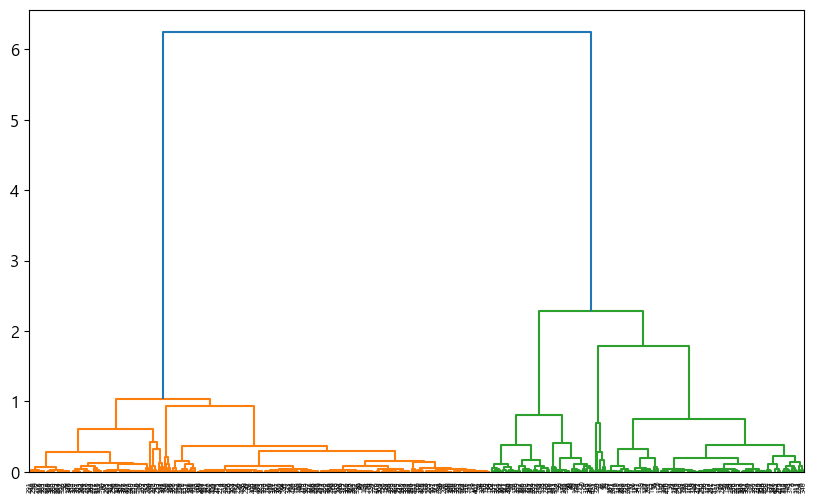

In [7]:
ac=AgglomerativeClustering(n_clusters=6, metric='euclidean',linkage='ward',compute_distances=True)
clustering=ac.fit(origin3_3)

counts=np.zeros(clustering.children_.shape[0])
n_samples=len(clustering.labels_)

for i,merge in enumerate(clustering.children_):
    current_count=0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count +=1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i]=current_count

linkage_matrix=np.column_stack(
    [clustering.children_,clustering.distances_,counts]
).astype(float)

#plot the corresponding dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.show()
plt.close()

In [8]:
clustering.labels_

array([0, 1, 4, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 0, 4, 1, 1, 1, 1, 1,
       3, 1, 3, 1, 1, 1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 0, 4, 2, 2, 1,
       1, 2, 2, 2, 0, 2, 2, 2, 4, 4, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 4, 0, 2, 0, 0, 2, 0, 2, 4, 4, 1, 1, 4, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 5, 2, 2, 2, 0, 0, 4, 0, 2, 2, 2, 2, 0, 2, 2,
       1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 1, 0,
       1, 1, 1, 4, 2, 2, 1, 2, 2, 2, 0, 4, 4, 2, 4, 4, 5, 4, 2, 4, 4, 4,
       4, 4, 2, 2, 2, 2, 2, 2, 0, 2, 0, 4, 5, 1, 5, 4, 1, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 0, 4, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2,
       4, 0, 2, 2, 4, 2, 2, 2, 1, 1, 2, 2, 2, 1, 4, 4, 4, 2, 2, 4, 4, 2,
       4, 2, 4, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2, 4, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 1, 1, 1, 1, 2, 2, 4, 2, 4, 2,
       4, 4, 0, 4, 0, 2, 2, 4, 4, 2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 4, 4, 2,
       2, 4, 2, 0, 2, 4, 4, 4, 2, 4, 4, 0, 4, 2, 2,

In [9]:
origin3_1['labels']=clustering.labels_
origin3_1.head()

,읍면동명,그린지수minmax,여가생활지수minmax,labels
0,청운효자동,0.187151,0.038298,0
1,사직동,0.033704,0.093504,1
2,삼청동,0.530328,0.077132,4
3,부암동,0.530328,0.024572,2
4,평창동,0.530960,0.007649,2


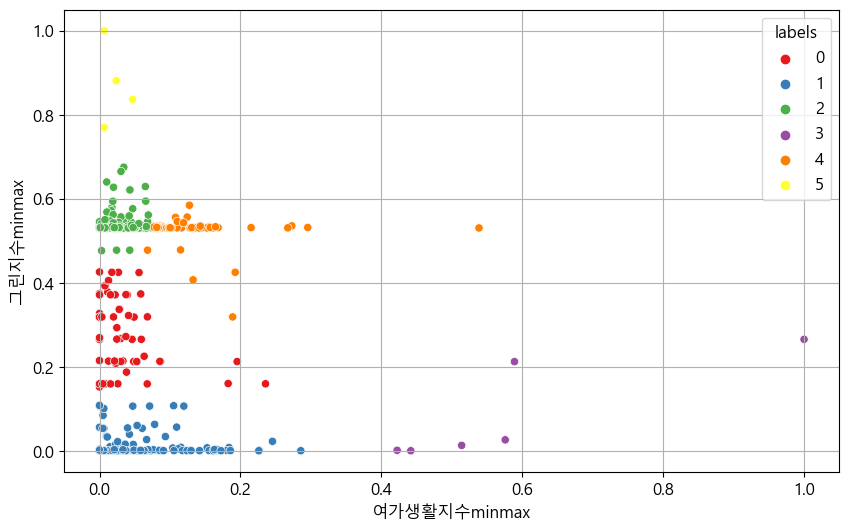

In [10]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=origin3_1,x='여가생활지수minmax',y='그린지수minmax',hue='labels',palette='Set1')
plt.grid()
plt.show()
plt.close()

In [11]:
origin3_1[origin3_1['labels']==4]

,읍면동명,그린지수minmax,여가생활지수minmax,labels
2,삼청동,0.530328,0.077132,4
16,숭인제2동,0.531143,0.149616,4
30,황학동,0.530417,0.538619,4
40,한강로동,0.531320,0.090405,4
52,행당제1동,0.530328,0.129298,4
...,...,...,...,...
365,대치제1동,0.534736,0.143040,4
371,도곡제2동,0.542886,0.119331,4
374,개포제3동,0.532446,0.077283,4
378,일원제1동,0.531365,0.083250,4


### 그린지수, 사회적약자지수

In [12]:
origin4=origin2.copy()
origin4_1=origin4.filter(['읍면동명','그린지수minmax','사회적약자_지원_인프라_밀집도minmax']) # 클러스터링 아이디 붙일 변수
origin4_3=origin4.filter(['그린지수minmax','사회적약자_지원_인프라_밀집도minmax']) # 계층군집용 변수
origin4_3.head()

,그린지수minmax,사회적약자_지원_인프라_밀집도minmax
0,0.187151,0.120179
1,0.033704,0.033721
2,0.530328,0.078692
3,0.530328,0.104086
4,0.530960,0.489879


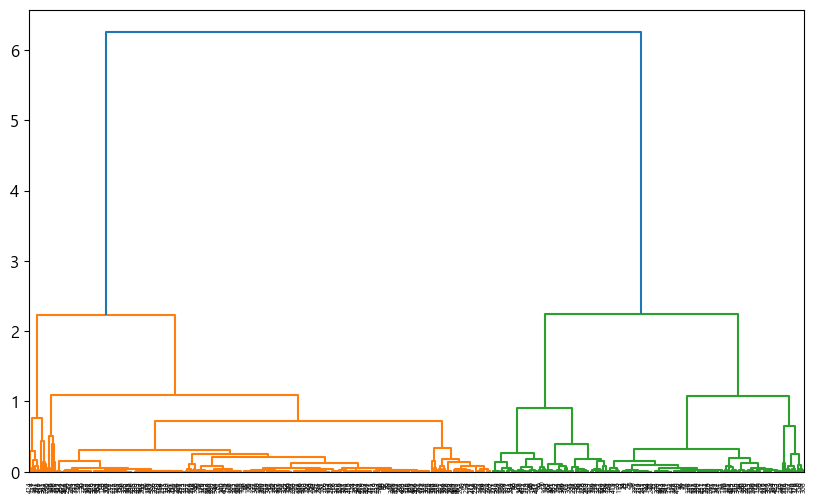

In [14]:
ac2=AgglomerativeClustering(n_clusters=6, metric='euclidean',linkage='ward',compute_distances=True)
clustering2=ac2.fit(origin4_3)

counts=np.zeros(clustering2.children_.shape[0])
n_samples=len(clustering2.labels_)

for i,merge in enumerate(clustering2.children_):
    current_count=0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count +=1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i]=current_count

linkage_matrix=np.column_stack(
    [clustering2.children_,clustering2.distances_,counts]
).astype(float)

#plot the corresponding dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.show()
plt.close()

In [15]:
clustering2.labels_

array([0, 5, 3, 3, 1, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 0, 3, 2, 5, 2, 5, 5,
       5, 5, 0, 5, 5, 5, 0, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5, 0, 3, 3, 3, 5,
       5, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 5, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 5, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 4, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3,
       2, 5, 5, 5, 5, 3, 3, 5, 5, 2, 5, 5, 5, 3, 5, 3, 0, 0, 3, 3, 5, 0,
       5, 5, 5, 3, 3, 3, 5, 3, 3, 1, 0, 0, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 0, 3, 4, 5, 4, 3, 2, 3, 5, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2, 5, 5, 5, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 0, 5, 3, 5, 5, 5, 5, 5, 5, 0, 5, 3, 3, 5, 3, 3, 3, 0,
       5, 0, 5, 5, 5, 5, 5, 5, 5, 1, 3, 3, 2, 5, 2, 5, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 5, 3, 3, 0, 0, 5, 3, 3, 3, 3, 3,
       3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,

In [16]:
origin4_1['labels']=clustering2.labels_
origin4_1.head()

,읍면동명,그린지수minmax,사회적약자_지원_인프라_밀집도minmax,labels
0,청운효자동,0.187151,0.120179,0
1,사직동,0.033704,0.033721,5
2,삼청동,0.530328,0.078692,3
3,부암동,0.530328,0.104086,3
4,평창동,0.530960,0.489879,1


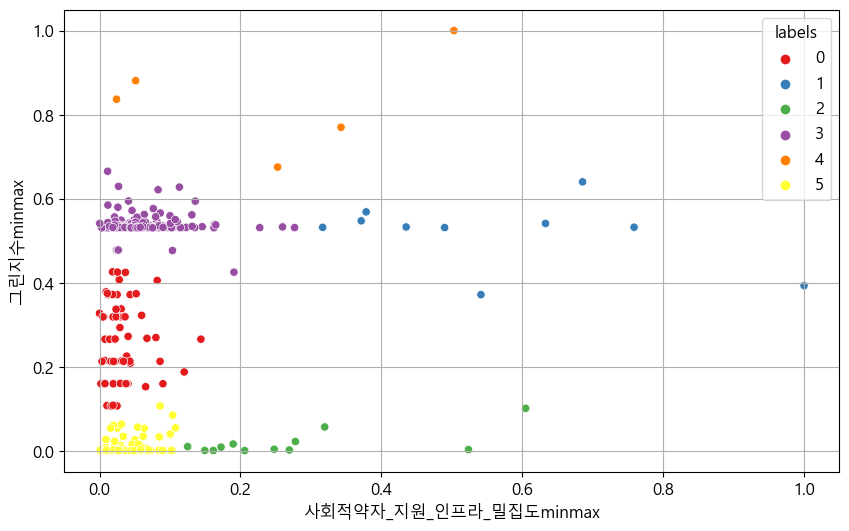

In [17]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=origin4_1,x='사회적약자_지원_인프라_밀집도minmax',y='그린지수minmax',hue='labels',palette='Set1')
plt.grid()
plt.show()
plt.close()

In [19]:
origin4_1[origin4_1['labels']==1]

,읍면동명,그린지수minmax,사회적약자_지원_인프라_밀집도minmax,labels
4,평창동,0.530960,0.489879,1
141,우이동,0.532390,0.435221,1
161,공릉제2동,0.531509,0.316715,1
221,상암동,0.639808,0.685642,1
251,가양제1동,0.568307,0.378473,1
288,여의동,0.540801,0.632994,1
345,반포본동,0.531875,0.758721,1
357,내곡동,0.392633,1.000000,1
376,세곡동,0.546961,0.371394,1
424,둔촌제1동,0.371230,0.541383,1


### 그린지수, 접근성지수

In [20]:
origin5=origin2.copy()
origin5_1=origin5.filter(['읍면동명','그린지수minmax','접근성지수minmax']) # 클러스터링 아이디 붙일 변수
origin5_3=origin5.filter(['그린지수minmax','접근성지수minmax']) # 계층군집용 변수
origin5_3.head()

,그린지수minmax,접근성지수minmax
0,0.187151,0.035322
1,0.033704,0.131414
2,0.530328,0.040614
3,0.530328,0.043385
4,0.530960,0.018995


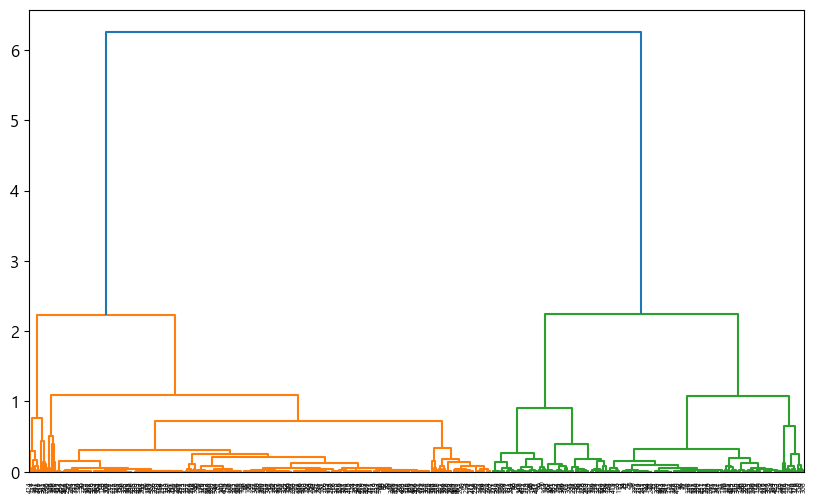

In [29]:
ac3=AgglomerativeClustering(n_clusters=6, metric='euclidean',linkage='ward',compute_distances=True)
clustering3=ac3.fit(origin4_3)

counts=np.zeros(clustering3.children_.shape[0])
n_samples=len(clustering3.labels_)

for i,merge in enumerate(clustering3.children_):
    current_count=0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count +=1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i]=current_count

linkage_matrix=np.column_stack(
    [clustering3.children_,clustering3.distances_,counts]
).astype(float)

#plot the corresponding dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.show()
plt.close()

In [22]:
clustering3.labels_

array([0, 5, 3, 3, 1, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 0, 3, 2, 5, 2, 5, 5,
       5, 5, 0, 5, 5, 5, 0, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5, 0, 3, 3, 3, 5,
       5, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 5, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 5, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 4, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3,
       2, 5, 5, 5, 5, 3, 3, 5, 5, 2, 5, 5, 5, 3, 5, 3, 0, 0, 3, 3, 5, 0,
       5, 5, 5, 3, 3, 3, 5, 3, 3, 1, 0, 0, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 0, 3, 4, 5, 4, 3, 2, 3, 5, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2, 5, 5, 5, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 0, 5, 3, 5, 5, 5, 5, 5, 5, 0, 5, 3, 3, 5, 3, 3, 3, 0,
       5, 0, 5, 5, 5, 5, 5, 5, 5, 1, 3, 3, 2, 5, 2, 5, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 5, 3, 3, 0, 0, 5, 3, 3, 3, 3, 3,
       3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,

In [23]:
origin5_1['labels']=clustering3.labels_
origin5_1.head()

,읍면동명,그린지수minmax,접근성지수minmax,labels
0,청운효자동,0.187151,0.035322,0
1,사직동,0.033704,0.131414,5
2,삼청동,0.530328,0.040614,3
3,부암동,0.530328,0.043385,3
4,평창동,0.530960,0.018995,1


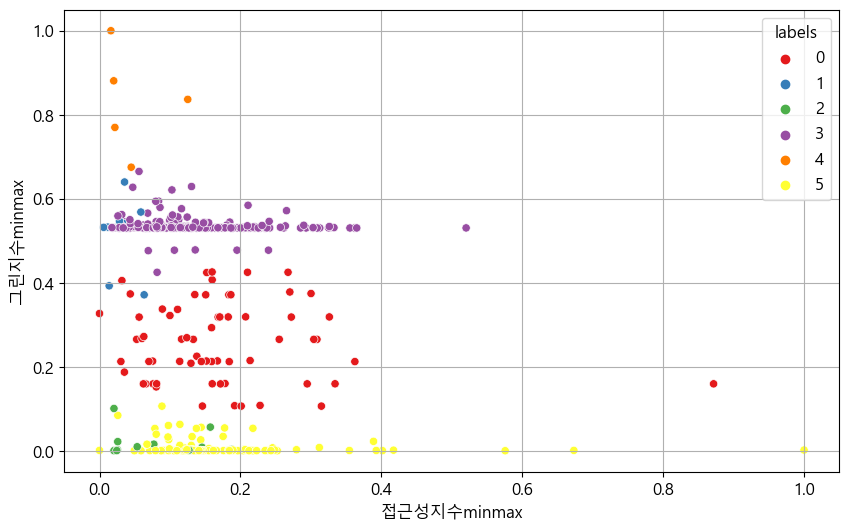

In [24]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=origin5_1,x='접근성지수minmax',y='그린지수minmax',hue='labels',palette='Set1')
plt.grid()
plt.show()
plt.close()

In [27]:
origin5_1[origin5_1['labels']==1]

,읍면동명,그린지수minmax,접근성지수minmax,labels
4,평창동,0.530960,0.018995,1
141,우이동,0.532390,0.011682,1
161,공릉제2동,0.531509,0.024581,1
221,상암동,0.639808,0.035544,1
251,가양제1동,0.568307,0.058695,1
288,여의동,0.540801,0.035140,1
345,반포본동,0.531875,0.005881,1
357,내곡동,0.392633,0.013707,1
376,세곡동,0.546961,0.028292,1
424,둔촌제1동,0.371230,0.063369,1


### 여가생활지수, 사회적약자지수

In [30]:
origin6=origin2.copy()
origin6_1=origin6.filter(['읍면동명','여가생활지수minmax','사회적약자_지원_인프라_밀집도minmax']) # 클러스터링 아이디 붙일 변수
origin6_3=origin6.filter(['여가생활지수minmax','사회적약자_지원_인프라_밀집도minmax']) # 계층군집용 변수
origin6_3.head()

,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax
0,0.038298,0.120179
1,0.093504,0.033721
2,0.077132,0.078692
3,0.024572,0.104086
4,0.007649,0.489879


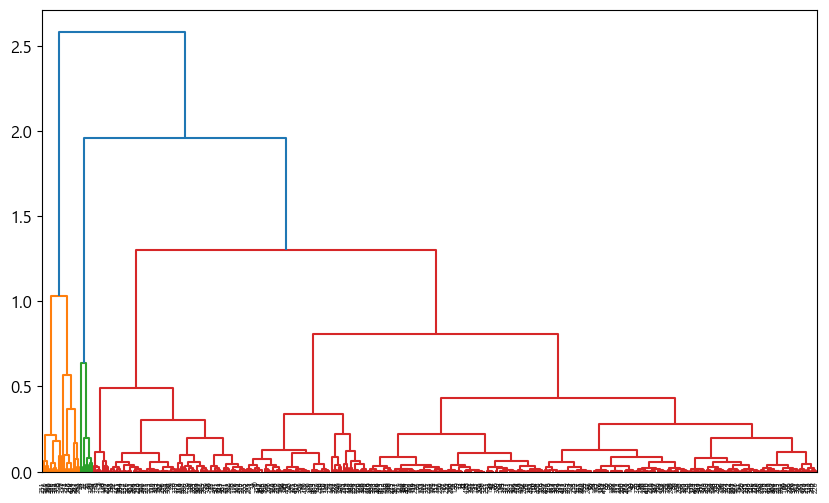

In [33]:
ac4=AgglomerativeClustering(n_clusters=6, metric='euclidean',linkage='ward',compute_distances=True)
clustering4=ac4.fit(origin6_3)

counts=np.zeros(clustering4.children_.shape[0])
n_samples=len(clustering4.labels_)

for i,merge in enumerate(clustering4.children_):
    current_count=0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count +=1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i]=current_count

linkage_matrix=np.column_stack(
    [clustering4.children_,clustering4.distances_,counts]
).astype(float)

#plot the corresponding dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.show()
plt.close()

In [34]:
clustering4.labels_

array([5, 3, 2, 5, 1, 3, 3, 2, 4, 3, 0, 0, 0, 2, 2, 2, 3, 5, 3, 4, 5, 2,
       0, 3, 0, 2, 3, 3, 2, 3, 0, 2, 2, 2, 5, 2, 2, 2, 3, 2, 5, 5, 2, 2,
       2, 5, 5, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 5, 2,
       2, 3, 2, 2, 5, 2, 5, 2, 2, 2, 2, 2, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 5, 2,
       5, 2, 2, 2, 3, 5, 3, 3, 2, 5, 5, 3, 3, 2, 2, 5, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 5, 3, 3, 2, 3, 3, 1, 3, 2, 2, 3, 3,
       3, 2, 5, 2, 2, 2, 5, 4, 5, 2, 5, 3, 2, 3, 4, 3, 5, 2, 3, 2, 2, 2,
       5, 5, 2, 2, 2, 5, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 5, 5, 2,
       3, 2, 2, 5, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 5, 2, 3, 3, 2,
       2, 1, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 2, 2, 2, 2, 3,
       2, 3, 2, 2, 3, 2, 2, 2, 2, 4, 2, 3, 5, 2, 1, 5, 4, 2, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 2, 2, 3, 3, 5, 5, 2, 5, 5, 2, 2, 2, 5, 2, 2, 3, 2,
       2, 3, 1, 2, 2, 3, 3, 3, 5, 3, 3, 2, 3, 2, 2,

In [35]:
origin6_1['labels']=clustering4.labels_
origin6_1.head()

,읍면동명,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,labels
0,청운효자동,0.038298,0.120179,5
1,사직동,0.093504,0.033721,3
2,삼청동,0.077132,0.078692,2
3,부암동,0.024572,0.104086,5
4,평창동,0.007649,0.489879,1


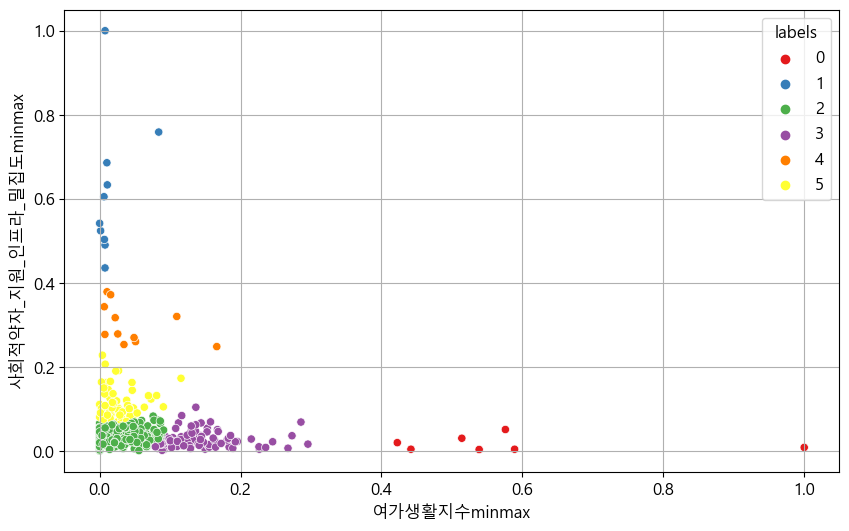

In [36]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=origin6_1,x='여가생활지수minmax',y='사회적약자_지원_인프라_밀집도minmax',hue='labels',palette='Set1')
plt.grid()
plt.show()
plt.close()

In [37]:
origin6_1[origin6_1['labels']==1]

,읍면동명,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,labels
4,평창동,0.007649,0.489879,1
141,우이동,0.007594,0.435221,1
148,도봉제1동,0.006700,0.503008,1
191,진관동,0.006152,0.604788,1
221,상암동,0.010243,0.685642,1
256,공항동,0.001385,0.523711,1
288,여의동,0.010850,0.632994,1
345,반포본동,0.083809,0.758721,1
357,내곡동,0.007691,1.000000,1
424,둔촌제1동,0.000000,0.541383,1


### 여가생활지수, 접근성지수

In [38]:
origin7=origin2.copy()
origin7_1=origin7.filter(['읍면동명','여가생활지수minmax','접근성지수minmax']) # 클러스터링 아이디 붙일 변수
origin7_3=origin7.filter(['여가생활지수minmax','접근성지수minmax']) # 계층군집용 변수
origin7_3.head()

,여가생활지수minmax,접근성지수minmax
0,0.038298,0.035322
1,0.093504,0.131414
2,0.077132,0.040614
3,0.024572,0.043385
4,0.007649,0.018995


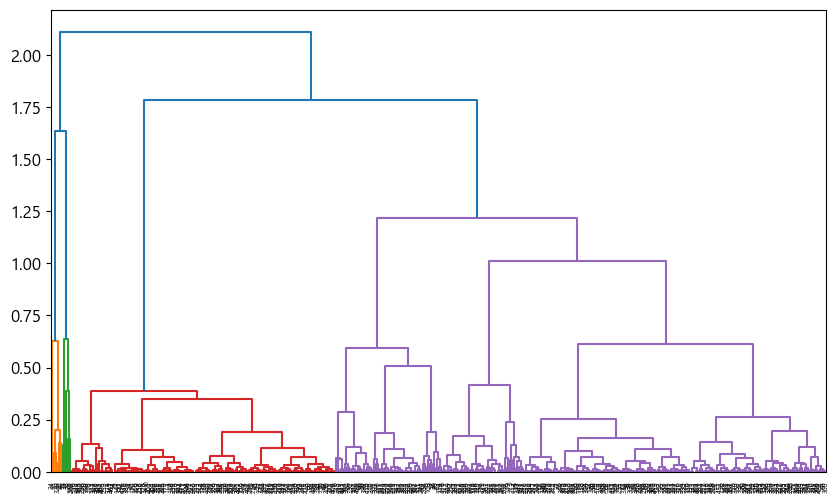

In [39]:
ac5=AgglomerativeClustering(n_clusters=6, metric='euclidean',linkage='ward',compute_distances=True)
clustering5=ac5.fit(origin7_3)

counts=np.zeros(clustering5.children_.shape[0])
n_samples=len(clustering5.labels_)

for i,merge in enumerate(clustering5.children_):
    current_count=0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count +=1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i]=current_count

linkage_matrix=np.column_stack(
    [clustering5.children_,clustering5.distances_,counts]
).astype(float)

#plot the corresponding dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.show()
plt.close()

In [40]:
clustering5.labels_

array([5, 3, 5, 5, 5, 2, 4, 3, 2, 4, 1, 1, 0, 0, 5, 5, 4, 2, 2, 2, 5, 5,
       1, 4, 1, 3, 4, 3, 3, 0, 1, 3, 3, 5, 3, 3, 3, 3, 4, 0, 3, 5, 5, 3,
       5, 5, 5, 5, 3, 3, 3, 3, 4, 4, 3, 4, 4, 3, 5, 5, 5, 5, 3, 3, 5, 3,
       3, 4, 4, 4, 5, 3, 5, 4, 5, 5, 5, 4, 5, 2, 3, 3, 3, 5, 3, 5, 3, 3,
       3, 5, 4, 5, 3, 3, 3, 3, 3, 3, 5, 5, 3, 4, 4, 3, 3, 3, 5, 5, 5, 5,
       5, 3, 3, 5, 2, 5, 2, 2, 3, 5, 5, 2, 2, 3, 3, 3, 3, 3, 3, 5, 2, 3,
       3, 3, 5, 4, 3, 5, 5, 3, 3, 5, 5, 2, 2, 3, 2, 4, 5, 2, 3, 4, 4, 2,
       4, 3, 5, 3, 5, 5, 3, 5, 5, 3, 5, 2, 5, 2, 5, 4, 5, 3, 2, 3, 5, 5,
       3, 5, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5,
       2, 5, 5, 3, 2, 3, 3, 3, 3, 2, 3, 3, 4, 4, 2, 4, 4, 5, 5, 2, 4, 3,
       5, 5, 3, 3, 4, 4, 5, 3, 3, 5, 3, 3, 2, 5, 3, 3, 5, 3, 5, 5, 5, 2,
       5, 2, 4, 4, 4, 3, 3, 3, 4, 5, 5, 2, 5, 3, 5, 3, 5, 5, 2, 5, 2, 3,
       4, 2, 3, 2, 3, 3, 3, 2, 4, 5, 5, 5, 3, 3, 3, 3, 3, 3, 5, 5, 2, 5,
       3, 2, 5, 3, 3, 2, 2, 2, 5, 4, 4, 3, 4, 3, 3,

In [41]:
origin7_1['labels']=clustering5.labels_
origin7_1.head()

,읍면동명,여가생활지수minmax,접근성지수minmax,labels
0,청운효자동,0.038298,0.035322,5
1,사직동,0.093504,0.131414,3
2,삼청동,0.077132,0.040614,5
3,부암동,0.024572,0.043385,5
4,평창동,0.007649,0.018995,5


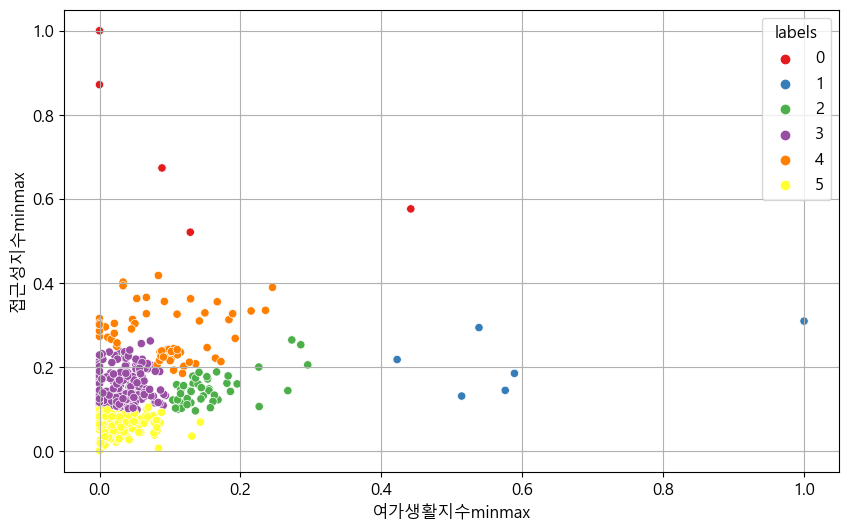

In [42]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=origin7_1,x='여가생활지수minmax',y='접근성지수minmax',hue='labels',palette='Set1')
plt.grid()
plt.show()
plt.close()

In [43]:
origin7_1[origin7_1['labels']==4]

,읍면동명,여가생활지수minmax,접근성지수minmax,labels
6,교남동,0.083546,0.417298,4
9,종로5.6가동,0.167139,0.354705,4
16,숭인제2동,0.149616,0.328250,4
23,을지로동,0.152761,0.245618,4
26,약수동,0.183734,0.312006,4
38,효창동,0.245524,0.388930,4
52,행당제1동,0.129298,0.361856,4
53,행당제2동,0.188989,0.326227,4
55,금호1가동,0.011565,0.270143,4
56,금호2.3가동,0.024453,0.248736,4


### 사회적약자지수, 접근성지수

In [44]:
origin8=origin2.copy()
origin8_1=origin8.filter(['읍면동명','사회적약자_지원_인프라_밀집도minmax','접근성지수minmax']) # 클러스터링 아이디 붙일 변수
origin8_3=origin8.filter(['사회적약자_지원_인프라_밀집도minmax','접근성지수minmax']) # 계층군집용 변수
origin8_3.head()

,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,0.120179,0.035322
1,0.033721,0.131414
2,0.078692,0.040614
3,0.104086,0.043385
4,0.489879,0.018995


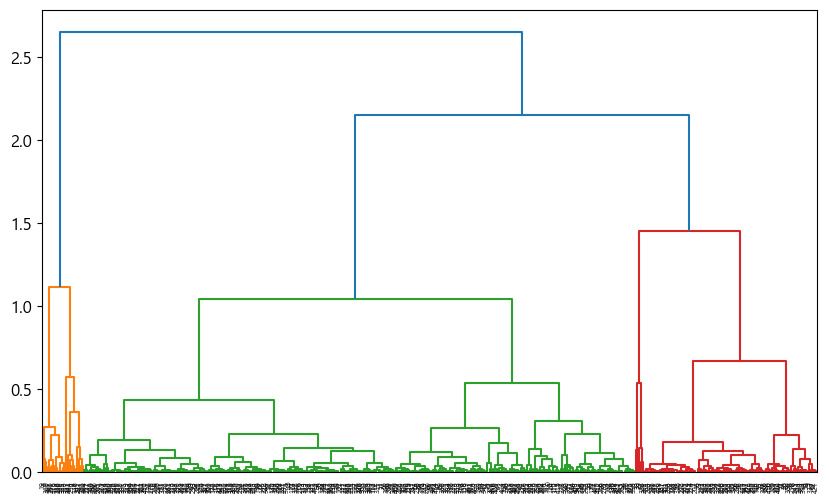

In [45]:
ac6=AgglomerativeClustering(n_clusters=6, metric='euclidean',linkage='ward',compute_distances=True)
clustering6=ac6.fit(origin8_3)

counts=np.zeros(clustering6.children_.shape[0])
n_samples=len(clustering6.labels_)

for i,merge in enumerate(clustering6.children_):
    current_count=0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count +=1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i]=current_count

linkage_matrix=np.column_stack(
    [clustering6.children_,clustering6.distances_,counts]
).astype(float)

#plot the corresponding dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.show()
plt.close()

In [46]:
clustering6.labels_

array([1, 5, 1, 1, 2, 5, 0, 0, 4, 0, 5, 5, 3, 3, 1, 1, 0, 1, 0, 4, 1, 1,
       0, 0, 0, 0, 0, 5, 5, 3, 0, 5, 5, 1, 1, 5, 5, 5, 0, 3, 1, 1, 1, 0,
       5, 1, 1, 1, 0, 5, 5, 5, 0, 0, 0, 0, 0, 5, 1, 1, 1, 1, 5, 5, 1, 5,
       0, 0, 0, 0, 1, 5, 1, 0, 1, 1, 1, 0, 1, 5, 5, 5, 5, 1, 5, 1, 5, 5,
       5, 1, 0, 1, 5, 5, 5, 5, 5, 0, 1, 1, 0, 0, 0, 5, 5, 5, 1, 1, 1, 1,
       1, 0, 5, 5, 0, 1, 5, 5, 5, 4, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5,
       0, 5, 5, 0, 5, 1, 1, 0, 0, 2, 1, 5, 5, 5, 5, 0, 2, 0, 5, 0, 0, 5,
       0, 0, 1, 5, 1, 1, 5, 4, 1, 0, 1, 5, 1, 5, 4, 0, 1, 5, 5, 5, 1, 1,
       5, 1, 5, 5, 5, 5, 0, 5, 5, 0, 0, 5, 5, 5, 1, 2, 5, 5, 0, 1, 1, 1,
       5, 1, 1, 1, 0, 0, 5, 0, 0, 5, 0, 5, 0, 5, 5, 0, 5, 1, 1, 5, 0, 5,
       1, 2, 5, 5, 0, 0, 1, 5, 5, 1, 5, 5, 5, 1, 5, 5, 1, 5, 1, 1, 1, 5,
       1, 5, 0, 0, 5, 5, 5, 5, 0, 4, 1, 5, 1, 5, 2, 5, 4, 1, 5, 1, 1, 5,
       0, 5, 5, 1, 5, 5, 5, 5, 0, 1, 1, 1, 1, 1, 5, 5, 0, 1, 1, 1, 5, 1,
       5, 5, 2, 0, 5, 5, 5, 5, 1, 0, 0, 5, 0, 0, 0,

In [47]:
origin8_1['labels']=clustering6.labels_
origin8_1.head()

,읍면동명,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,labels
0,청운효자동,0.120179,0.035322,1
1,사직동,0.033721,0.131414,5
2,삼청동,0.078692,0.040614,1
3,부암동,0.104086,0.043385,1
4,평창동,0.489879,0.018995,2


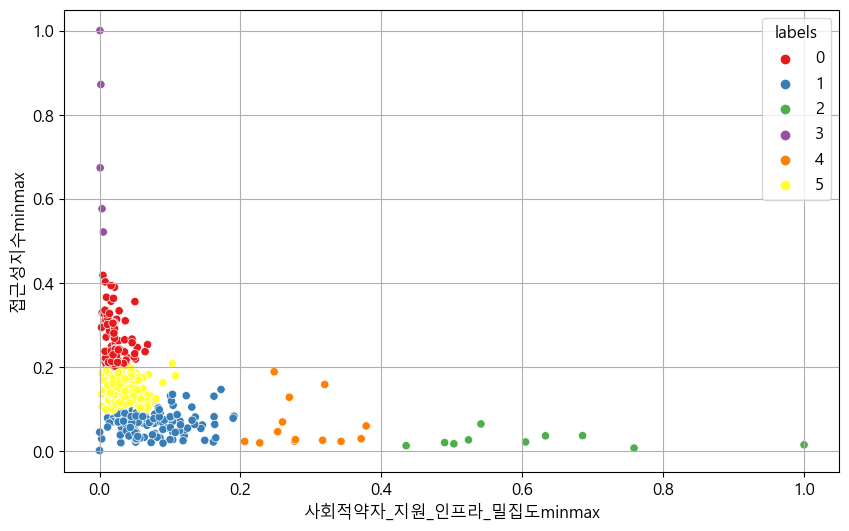

In [48]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=origin8_1,x='사회적약자_지원_인프라_밀집도minmax',y='접근성지수minmax',hue='labels',palette='Set1')
plt.grid()
plt.show()
plt.close()

In [49]:
origin8_1[origin8_1['labels']==2]

,읍면동명,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,labels
4,평창동,0.489879,0.018995,2
141,우이동,0.435221,0.011682,2
148,도봉제1동,0.503008,0.016147,2
191,진관동,0.604788,0.020526,2
221,상암동,0.685642,0.035544,2
256,공항동,0.523711,0.025469,2
288,여의동,0.632994,0.035140,2
345,반포본동,0.758721,0.005881,2
357,내곡동,1.000000,0.013707,2
424,둔촌제1동,0.541383,0.063369,2
